In [1]:
#drive.mount("/content/drive", force_remount=True)
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

data = datasets.load_boston(return_X_y=False)
boston = datasets.load_boston(return_X_y=False)
# data

In [3]:
import pandas as pd
# creating the dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
dataframe = pd.DataFrame(data.data, columns=data.feature_names)
df.shape
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
a = 0.3 
dataset1 = dataframe.copy()
train_dataset = dataset1.sample(frac = a)
dataset1 = dataset1.drop(train_dataset.index)
a = 1/7
validation_dataset = dataset1.sample(frac = a)
test_dataset = dataset1.drop(validation_dataset.index)

print("train_dataset.....")
print(train_dataset)

print("validation_dataset.....")
print(validation_dataset)

print("test_dataset.....")
print(test_dataset)

X = boston.data                            
Y = boston.target 
# print(Y)


train_dataset.....
         CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
125   0.16902   0.0  25.65   0.0  0.581  ...   2.0  188.0     19.1  385.02  14.81
487   4.83567   0.0  18.10   0.0  0.583  ...  24.0  666.0     20.2  388.22  11.45
494   0.27957   0.0   9.69   0.0  0.585  ...   6.0  391.0     19.2  396.90  13.59
216   0.04560   0.0  13.89   1.0  0.550  ...   5.0  276.0     16.4  392.80  13.51
29    1.00245   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  380.23  11.98
..        ...   ...    ...   ...    ...  ...   ...    ...      ...     ...    ...
305   0.05479  33.0   2.18   0.0  0.472  ...   7.0  222.0     18.4  393.36   8.93
470   4.34879   0.0  18.10   0.0  0.580  ...  24.0  666.0     20.2  396.90  16.29
410  51.13580   0.0  18.10   0.0  0.597  ...  24.0  666.0     20.2    2.60  10.11
335   0.03961   0.0   5.19   0.0  0.515  ...   5.0  224.0     20.2  396.90   8.01
333   0.05083   0.0   5.19   0.0  0.515  ...   5.0  224.0     20.2  389.71   5.

In [5]:

data = boston.data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardised_data = sc.fit_transform(data)
 
additional_feature = np.ones(boston.data.shape[0])

feature_data = np.vstack((additional_feature,standardised_data.T)).T

# Actual prices of houses
target_price = boston.target


# Stochastic Gradient Descent Algorithm :
# Let 'K' be the number of random rows selected out of the dataset
# Initialize the weight vector
#Let r = learning_rate and m = number of training_examples
# Let r =1
# repeat until convergence {
#    weight[j] = weight[j] - (r/m)*((Σfrom i=1 to K)of(((weight.T * feature_data[i]) - target_price[i])* feature_data[i,j])
#    r /= 2  
#}
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, target_price, test_size = 0.3, random_state = 5)

In [6]:
# Initialising weight vector
# Generating 14 normally distributed values
weights = np.random.normal(0,1,feature_data.shape[1])

# Initialised Weights
weights

array([-0.8559244 , -0.73615475,  1.19051558, -0.39391712, -0.51711159,
       -1.05672855, -0.3170854 , -1.49434358, -0.12622536,  1.54112609,
        0.07922147,  0.07471363, -2.53533894,  3.55948403])

In [7]:
temp_w = np.zeros(feature_data.shape[1])
from numpy import random
epochs = [0.1, 0.01, 0.02, 0.03, 0.001]
rho = [0.5, 0.6 , 0.7, 0.8, 0.9]
learning_rate = [10, 20 , 30, 40, 50]

def SGD(f, w0, alpha, num_iters):
  # Initialised learning rate
  r = 0.001  
  iterations = 1000
  # training samples
  m = X_train.shape[0]    
  # batch size is to get batches for Stochastic Gradient Descent
  batch_size = 20 
	
  random_ids = random.choice(m,m,replace=False)
  X_shuffled = X_train[random_ids,:]
  y_shuffled = Y_train[random_ids]
  mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]
  # stochastic gradient descent : SGD
  while(iterations >=0):
      for batch in mini_batches:
          X_batch = batch[0]
          Y_batch = batch[1]
          for j in range(0,feature_data.shape[1]):
              temp_sum = 0
              for i in range(0,X_batch.shape[0]):
                  temp_sum += (( (np.sum( sc.inverse_transform(weights[1:14] * X_batch[i,1:])) + weights[0]*X_batch[i,0]) - Y_batch[i]) * X_batch[i,j])
              temp_w[j] = weights[j] - ((r/X_batch.shape[0])*temp_sum)
          weights = temp_w
      iterations -= 1 
    
# Weights of manual sgd
  manual_sgd_weights = weights



In [8]:
# Now predicting the house prices on X_test data
manual_sgd_predictions = np.zeros(X_test.shape[0])
for itr in range(0,X_test.shape[0]):
    manual_sgd_predictions[itr] = np.sum(sc.inverse_transform(weights[1:14]*X_test[itr,1:])) + weights[0]*X_test[itr,0]

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88   11.9

[506 rows x 14 

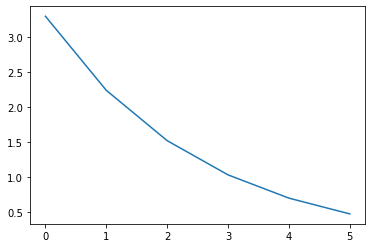

In [9]:
# Batch and stochastic both .
from sklearn import datasets
import pandas as pd


boston = datasets.load_boston(return_X_y=False)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
print(boston_df)

train_dataset = boston_df.sample(frac=0.3)
dataframe = boston_df.drop(train_dataset.index)
validation_dataset = dataframe.sample(frac=(.1/.7))
test_dataset = dataframe.drop(validation_dataset.index)

print("train dataset\n", train_dataset)
# print("validation dataset\n", validation_dataset)
# print("test dataset\n", test_dataset)


import numpy as np

def hypothesis(w, index, dataset): #h(x)
  sample =dataset[index][:-1]
  sample = np.concatenate([[1], sample])
  array = np.multiply(w, sample)
  return np.sum(array)


w=[1,1,1]
dataset = np.array([[1,2,6], [2,10,24]])

print(hypothesis(w, 0, dataset))
print(dataset)

# to calculate the predicted value with the help of hypothesis function
def predicted_values(w, dataset):
  predicted = []
  for i in range(len(dataset)):
    predicted.append(hypothesis(w, i, dataset))
  
  return np.array(predicted)

predicted = predicted_values(w, dataset)

print(predicted)


# to calculate mean square error
def MSE(predicted, actual):
  return np.square(np.subtract(predicted, actual)).mean()/2

MSE(predicted, dataset[:,-1])

# to update w using batch gradient decendent
def update_parameter(w, alpha, dataset):
  predicted = predicted_values(w, dataset)
  m = len(dataset)
  w[0] = w[0] - (alpha /m)*(np.sum(np.subtract(predicted, dataset[:, -1])))
  for i in range(1, len(w)):
    w[i] = w[i] - (alpha /m)*(np.sum(np.multiply(np.subtract(predicted, dataset[:, -1]), dataset[:, i-1])))
  return w


#w=update_parameter(w, 0.1, dataset)
print(update_parameter(w, 0.1, dataset))

# to update w using stochastic gradient decendent
def update_parameter_stochastic(w, alpha, dataset):
  np.random.shuffle(dataset)
  m = len(dataset)
  for j in range(m):
    hy = hypothesis(w, j, dataset)
    w[0] = w[0] - (alpha /m)*(hy- dataset[:, -1][j])
    for i in range(1, len(w)):
      w[i] = w[i] - (alpha /m)*((hy- dataset[:, -1][j])* dataset[:, i-1][j])
  return w
print(update_parameter_stochastic([1,1,1], 0.1, dataset))


def linear_regression(epoch, alpha, rho, w, train_dataset):
  epochs_MSE=[]
  pre_MSE = 0
  curr_MSE = 0
  for itr in range(epoch):
    predicted = predicted_values(w, train_dataset)
    curr_MSE = MSE(predicted, train_dataset[:,-1])
    w = update_parameter_stochastic(w, alpha, train_dataset)

    epochs_MSE.append(curr_MSE)

    if abs(curr_MSE - pre_MSE) <= rho:
      break;
  return w, epochs_MSE


from sklearn import preprocessing
w=[1 for _ in range(14)]

normalized = preprocessing.normalize(train_dataset.to_numpy())
w1, trains_MSE1 = linear_regression(10, 0.1, 0.5, w, normalized)


validation = preprocessing.normalize(validation_dataset.to_numpy())
predicted = predicted_values(w1, validation)
val_MSE1 = MSE(predicted, validation[:,-1])

# print(w1)
# print(trains_MSE1)
print("MSE of validation set")
print(val_MSE1)



w=[1 for _ in range(14)]
w2, trains_MSE2 = linear_regression(20, 0.01, 0.6, w, normalized)

predicted = predicted_values(w2, validation)
val_MSE2 = MSE(predicted, validation[:,-1])

# print(w2)
# print(trains_MSE2)
print("MSE of validation set")
print(val_MSE2)



w=[1 for _ in range(14)]
w3, trains_MSE3 = linear_regression(30, 0.02, 0.7, w, normalized)

predicted = predicted_values(w3, validation)
val_MSE3 = MSE(predicted, validation[:,-1])

# print(w3)
# print(trains_MSE3)
print("MSE of validation set")
print(val_MSE3)


w=[1 for _ in range(14)]
w4, trains_MSE4 = linear_regression(40, 0.03, 0.8, w, normalized)

predicted = predicted_values(w4, validation)
val_MSE4 = MSE(predicted, validation[:,-1])

# print(w4)
# print(trains_MSE4)
print("MSE of validation set")
print(val_MSE4)

w=[1 for _ in range(14)]
w5, trains_MSE5 = linear_regression(50, 0.001, 0.9, w, normalized)

predicted = predicted_values(w5, validation)
val_MSE5 = MSE(predicted, validation[:,-1])

# print(w5)
# print(trains_MSE5)
print("MSE of validation set")
print(val_MSE5)


print("All MSE considering the best hyperparameter")
print("Validation MSE :", val_MSE1)


train = preprocessing.normalize(train_dataset.to_numpy())
predicted = predicted_values(w1, train)
best_trainMSE = MSE(predicted, train[:,-1])

print("Train MSE:", best_trainMSE)

test = preprocessing.normalize(test_dataset.to_numpy())
predicted = predicted_values(w1, test)
best_testMSE = MSE(predicted, test[:,-1])

print("TEST MSE:", best_testMSE)

import matplotlib.pyplot as plt

# print(trains_MSE1)
epoch = [i for i in range(len(trains_MSE1))]
plt.plot(epoch, trains_MSE1)



